In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("fallos.csv", encoding="latin-1", delimiter=';') 

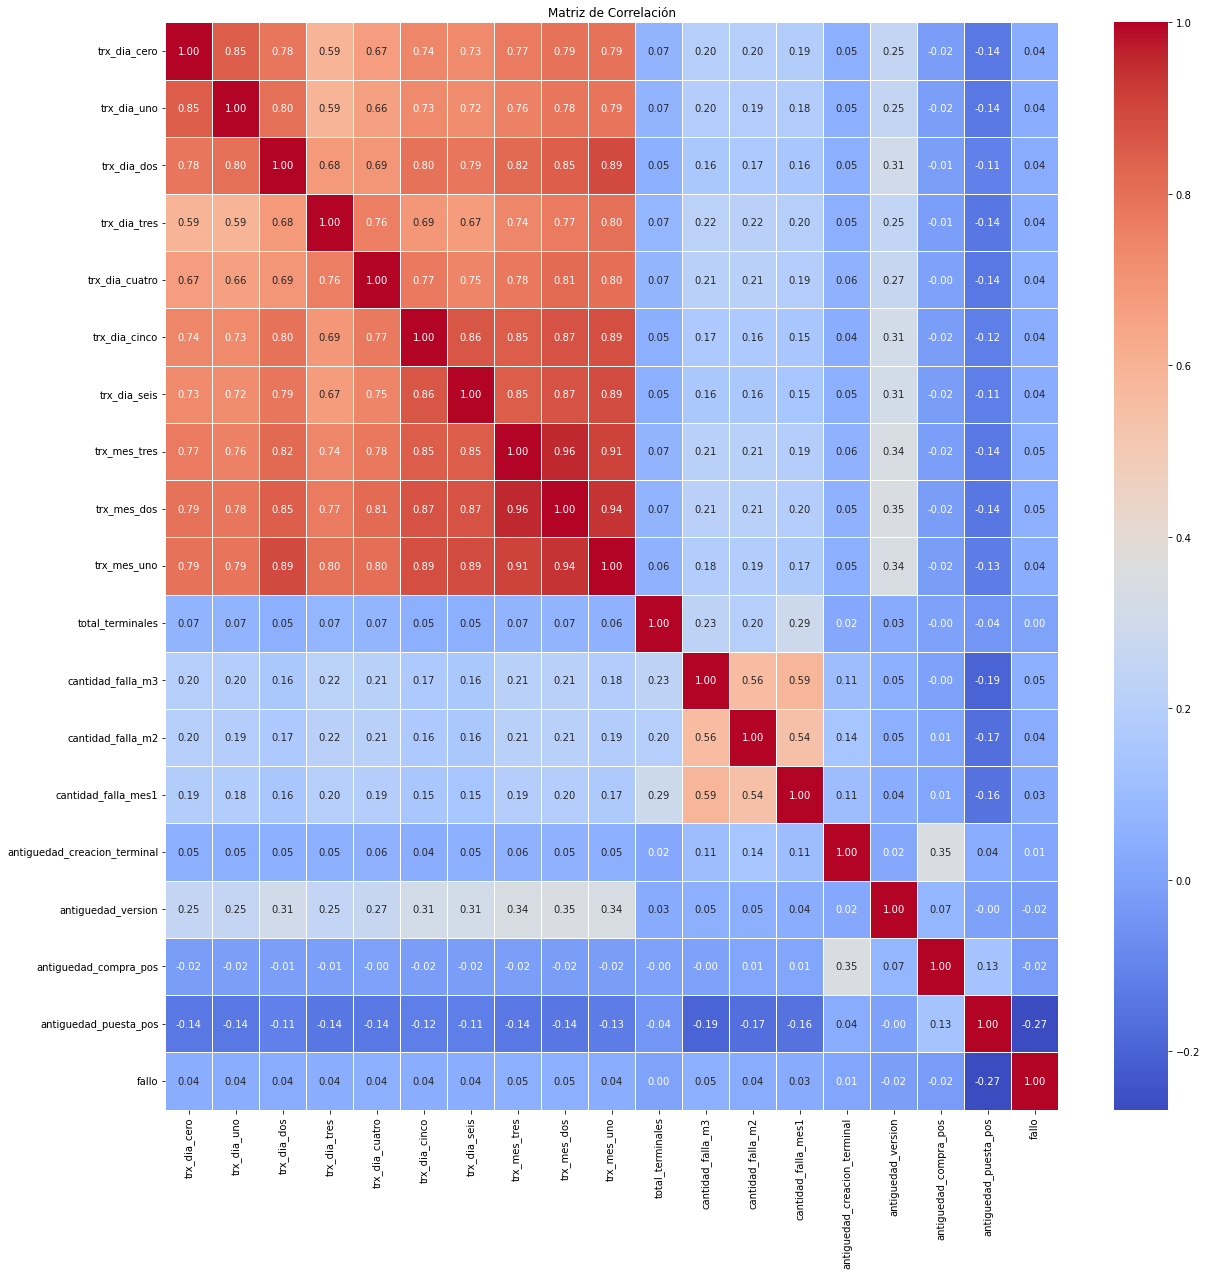

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df['fallo'] = pd.to_numeric(df['fallo'], errors='coerce')

# Selecciona solo las columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Establece un tamaño adecuado para la figura del mapa de calor
plt.figure(figsize=(20, 20))  # Ajusta el tamaño según necesites

# Genera el mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade un título al mapa de calor
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


In [3]:
# Eliminar columnas innecesarias que contienen valores faltantes y que no son relevantes para el análisis
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# verificar los valores faltantes para las columnas relevantes
print(df.isnull().sum())

mcodes                               0
terminal                             0
estado_terminal                      0
producto_red                         0
tecnologiapp                         0
modelopp                             0
tecnologiaaf                         0
modeloaf                             0
browser                              0
nombretipoter                        0
grupo_version                        0
mcc                                  0
grupo_version_ant                    0
ciudadfin                            0
trx_dia_cero                         0
trx_dia_uno                          0
trx_dia_dos                          0
trx_dia_tres                         0
trx_dia_cuatro                       0
trx_dia_cinco                        0
trx_dia_seis                         0
trx_mes_tres                         0
trx_mes_dos                          0
trx_mes_uno                          0
prom_mes_tres                        0
prom_mes_dos             

In [4]:
# Lista de variables categóricas a codificar
categorical_columns = ['estado_terminal', 'producto_red', 'tecnologiapp', 'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter', 'clase_falla']

# Aplicar One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Verificar las primeras filas para asegurarse de que la codificación se aplicó correctamente
print(df_encoded.head())

     mcodes      terminal grupo_version     mcc grupo_version_ant  \
0  33377982  1062A26IO473             h  aaaaaj                 k   
1  40596786  1383G8382195             j    aaad                 g   
2  47126784  1257A3QLV919             h     aab                 g   
3  35334915  1301F6964522             g       p                 e   
4  45002415  1693A39LE695             h   aaaaf                 k   

       ciudadfin  trx_dia_cero  trx_dia_uno  trx_dia_dos  trx_dia_tres  ...  \
0         CÚCUTA            63            0            0             0  ...   
1  VILLAVICENCIO            39           57           54            48  ...   
2   BARRANQUILLA             3            9            6             3  ...   
3          NEIVA             9           30           21            18  ...   
4           COTA            18           21            3            21  ...   

   nombretipoter_f  nombretipoter_g  nombretipoter_h  nombretipoter_i  \
0                0                1  

fallo                    1.000000
tecnologiapp_b           0.111710
tecnologiaaf_c           0.111444
nombretipoter_g          0.104111
modeloaf_j               0.083340
                           ...   
tecnologiaaf_b          -0.075397
nombretipoter_d         -0.099192
tecnologiapp_a          -0.111259
antiguedad_puesta_pos   -0.268135
clase_falla_a                 NaN
Name: fallo, Length: 122, dtype: float64


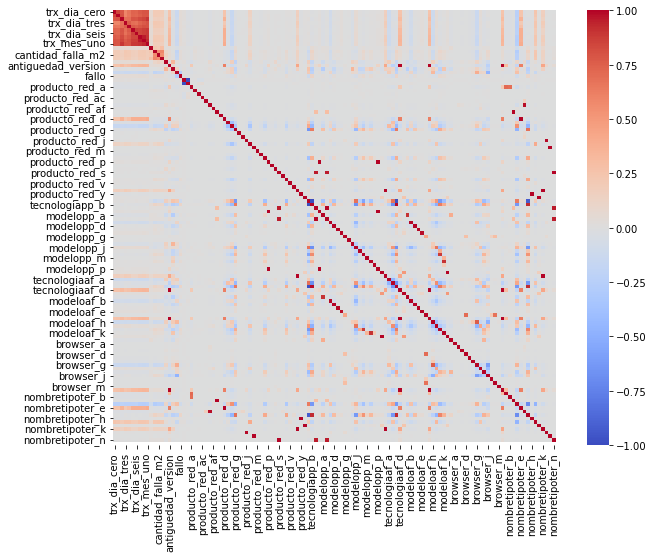

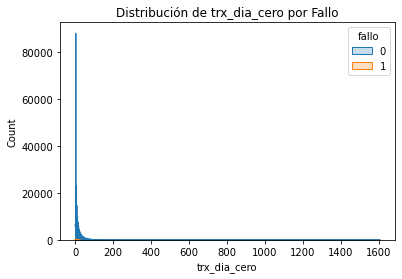

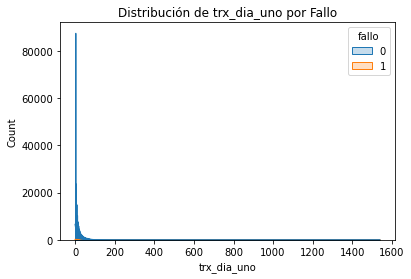

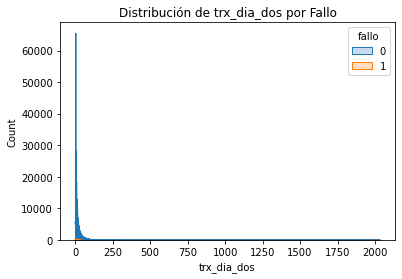

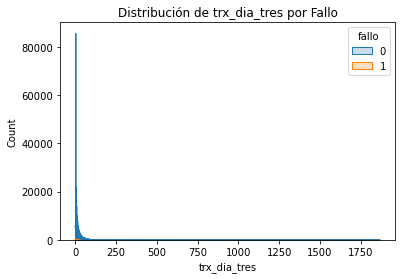

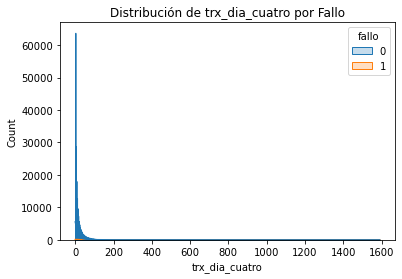

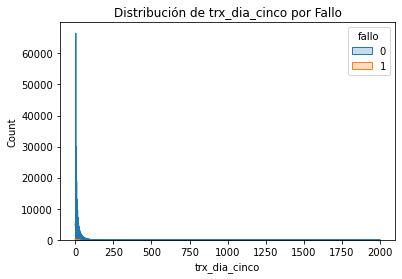

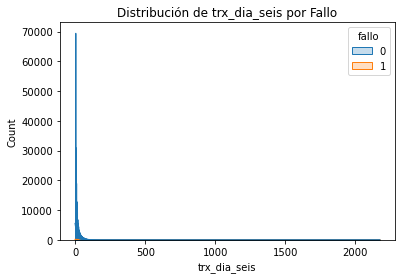

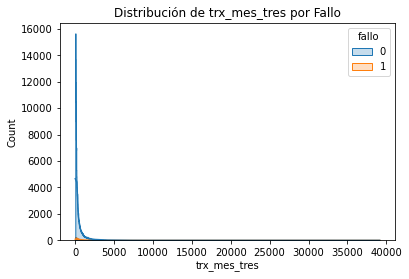

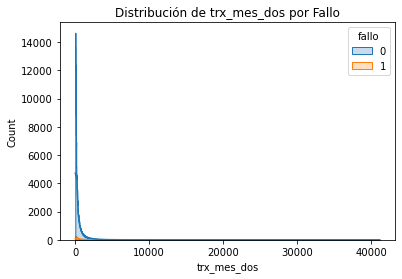

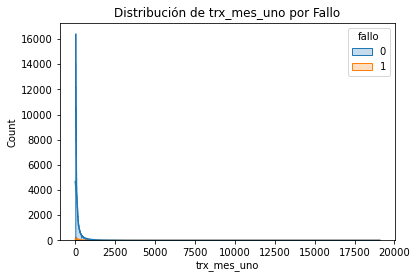

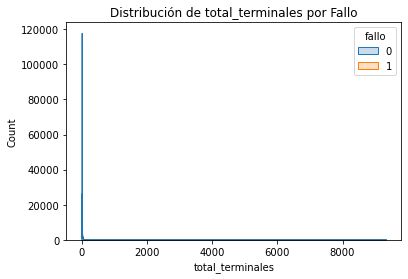

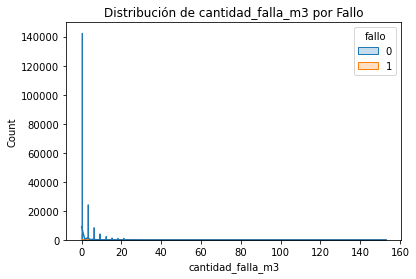

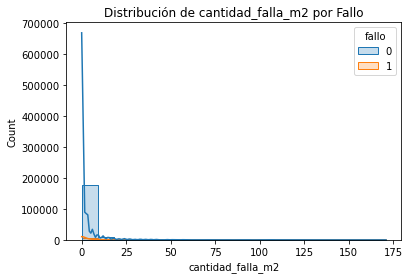

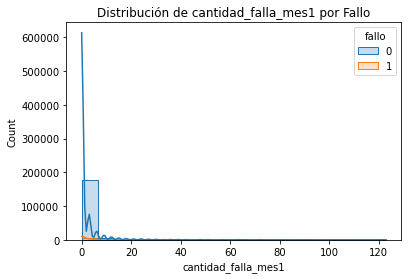

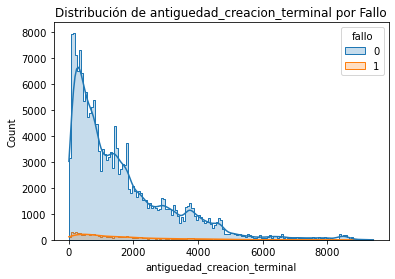

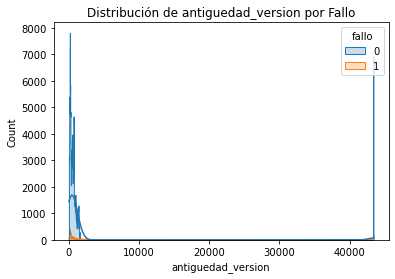

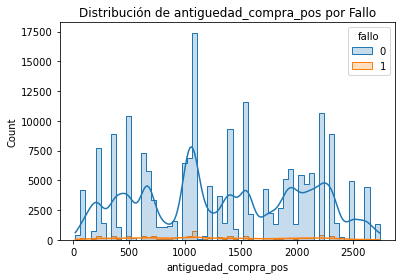

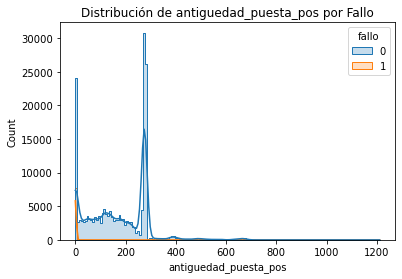

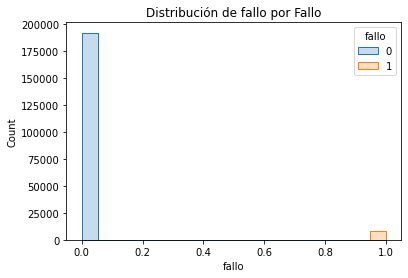

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlaciones con 'fallo'
correlation_matrix = df_encoded.corr()
correlations_with_fallo = correlation_matrix['fallo'].sort_values(ascending=False)
print(correlations_with_fallo)

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

# Histogramas de variables numéricas por 'fallo'
for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_encoded, x=column, hue='fallo', kde=True, element='step')
    plt.title(f'Distribución de {column} por Fallo')
    plt.show()


In [6]:
# Identificar las columnas no numéricas
non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns

# Imprimir las columnas no numéricas para revisión
print("Columnas no numéricas:", non_numeric_columns)

# Intentar convertir cada columna no numérica a numérica
for col in non_numeric_columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

# Después de la conversión, verifica nuevamente los tipos de datos para asegurarse de que la conversión fue exitosa
print(df_encoded.dtypes)

Columnas no numéricas: Index(['mcodes', 'terminal', 'grupo_version', 'mcc', 'grupo_version_ant',
       'ciudadfin', 'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno',
       'fecha_fallo', 'fecha_observacion,,,,'],
      dtype='object')
mcodes               float64
terminal             float64
grupo_version        float64
mcc                  float64
grupo_version_ant    float64
                      ...   
nombretipoter_k        uint8
nombretipoter_l        uint8
nombretipoter_m        uint8
nombretipoter_n        uint8
clase_falla_a          uint8
Length: 133, dtype: object


In [7]:
# Se convirtio 'fecha_fallo' a datetime correctamente, así que se omite aquí
# se intenta convertir 'fecha_observacion' para estar seguro de usar el nombre correcto, incluyendo las comas
df_encoded['fecha_observacion,,,,'] = pd.to_datetime(df_encoded['fecha_observacion,,,,'], errors='coerce')


In [8]:
print(df_encoded.columns)

Index(['mcodes', 'terminal', 'grupo_version', 'mcc', 'grupo_version_ant',
       'ciudadfin', 'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos',
       'trx_dia_tres',
       ...
       'nombretipoter_f', 'nombretipoter_g', 'nombretipoter_h',
       'nombretipoter_i', 'nombretipoter_j', 'nombretipoter_k',
       'nombretipoter_l', 'nombretipoter_m', 'nombretipoter_n',
       'clase_falla_a'],
      dtype='object', length=133)


In [9]:
from sklearn.model_selection import train_test_split

#  df_encoded es el DataFrame después de aplicar One-Hot Encoding y que 'fallo' es el nombre de la columna objetivo.

# Primero, se separa las características (X) de la etiqueta (y)
X = df_encoded.drop('fallo', axis=1)  # Elimina la columna 'fallo' para obtener las características
y = df_encoded['fallo']  # La columna 'fallo' es nuestra variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
# La convención es usar un 70-30% o un 80-20% de división entre entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# verifica el tamaño de los conjuntos de entrenamiento y prueba para estar seguro de que se dividieron correctamente
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (159998, 132)
X_test shape: (40000, 132)
y_train shape: (159998,)
y_test shape: (40000,)


In [10]:
# Verificar los tipos de datos
print(X_train.dtypes)
print(y_train.dtype)

mcodes               float64
terminal             float64
grupo_version        float64
mcc                  float64
grupo_version_ant    float64
                      ...   
nombretipoter_k        uint8
nombretipoter_l        uint8
nombretipoter_m        uint8
nombretipoter_n        uint8
clase_falla_a          uint8
Length: 132, dtype: object
int64


In [11]:
# X_train y X_test solo contengan columnas numéricas
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

# Convertir X_train y X_test a NumPy arrays si aún no lo son
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

In [13]:
# Crear y aplicar el imputador
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_np)
X_test_imputed = imputer.transform(X_test_np)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import numpy as np


# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Asegurarse de que no hay valores infinitos, convirtiéndolos a NaN
X_train_np = np.nan_to_num(X_train_np, nan=np.nan)
X_test_np = np.nan_to_num(X_test_np, nan=np.nan)

In [16]:
# Crear el imputador
imputer = SimpleImputer(strategy='mean')

In [17]:
# Aplicar la imputación a X_train_np y X_test_np
X_train_imputed = imputer.fit_transform(X_train_np)
X_test_imputed = imputer.transform(X_test_np)

In [18]:
# Verificar si aún hay NaN o valores infinitos después de la imputación
print("NaN en X_train después de imputar:", np.isnan(X_train_imputed).sum())
print("Inf en X_train después de imputar:", np.isinf(X_train_imputed).sum())

NaN en X_train después de imputar: 0
Inf en X_train después de imputar: 0


In [19]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [20]:
# Entrenar el modelo de Random Forest
rf.fit(X_train_imputed, y_train)

# Predecir las etiquetas para el conjunto de prueba imputado
y_pred_rf = rf.predict(X_test_imputed)

# Calcular métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Imprimir las métricas de evaluación
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, ROC AUC Score: {roc_auc_rf}")


Random Forest - Accuracy: 0.967175, Precision: 0.9309309309309309, Recall: 0.19375, F1 Score: 0.32074495602690123, ROC AUC Score: 0.5965755208333334
